<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Logistic Regression

### 1. Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')

### 3. Exploratory Data Analysis

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
dataset.shape

(400, 3)

In [7]:
col_names = dataset.columns

col_names

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Text(0, 0.5, 'EstimatedSalary')

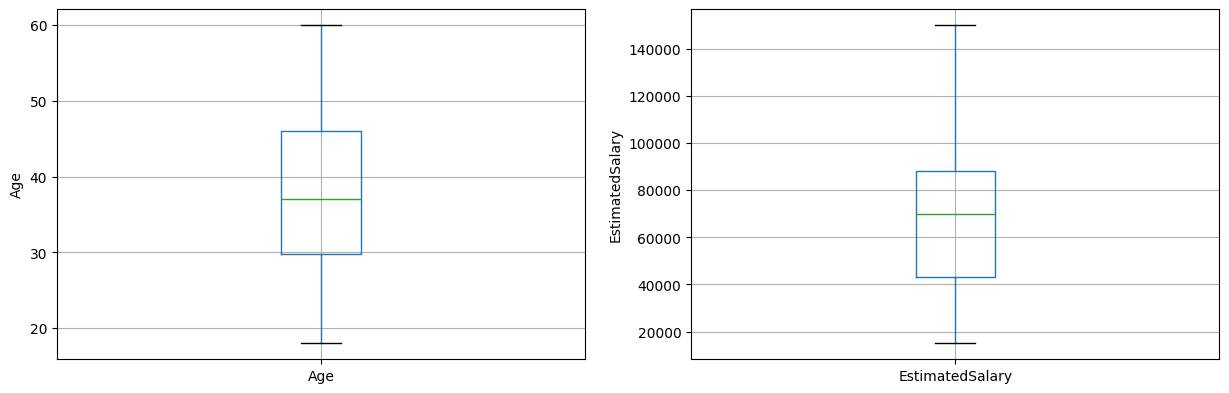

In [11]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataset.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 2)
fig = dataset.boxplot(column='EstimatedSalary')
fig.set_title('')
fig.set_ylabel('EstimatedSalary')


Text(0, 0.5, 'Frequency')

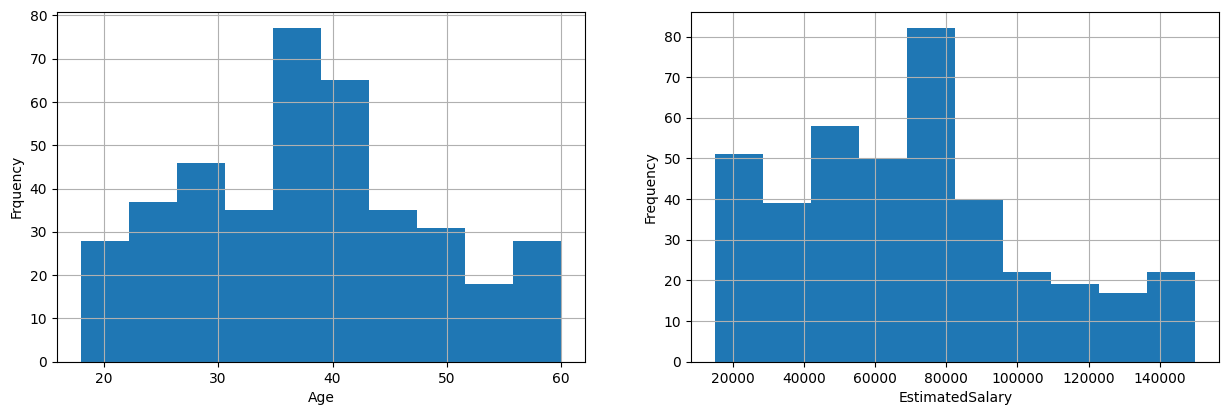

In [13]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataset.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Frquency')


plt.subplot(2, 2, 2)
fig = dataset.EstimatedSalary.hist(bins=10)
fig.set_xlabel('EstimatedSalary')
fig.set_ylabel('Frequency')

### 4. Data Preprocessing

In [14]:
X = dataset.drop(['Purchased'], axis=1)
y = dataset['Purchased']

In [15]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [16]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [18]:
X_train

,Age,EstimatedSalary
92,26,15000
328,36,118000
67,23,82000
254,50,44000
360,43,129000
...,...,...
241,38,59000
253,37,146000
390,48,33000
155,31,15000


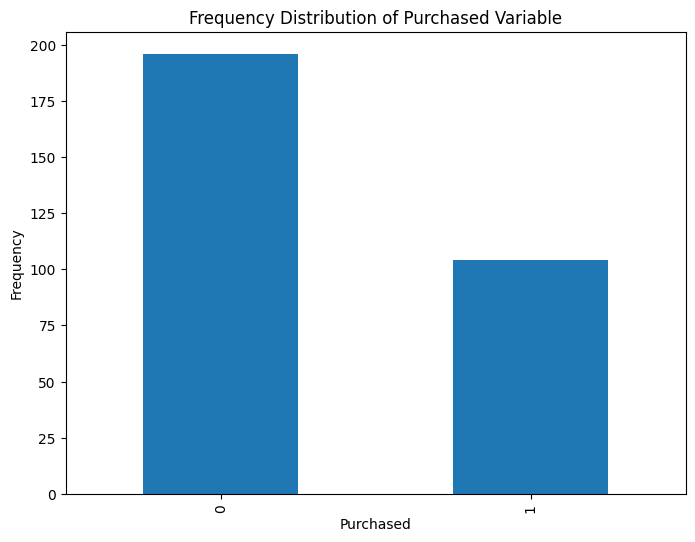

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your target variable is named 'target'
target_freq = y_train.value_counts()

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
target_freq.plot(kind='bar')
plt.xlabel('Purchased')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Purchased Variable')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-1.10470069 -1.63100201]
 [-0.13310817  1.4386753 ]
 [-1.39617844  0.36577838]
 [ 1.22712134 -0.76672393]
 [ 0.54700658  1.76650492]
 [-0.13310817  1.64729415]
 [ 0.44984733 -0.46869701]
 [ 1.12996209  0.54459453]
 [ 0.44984733  0.30617299]
 [ 1.12996209 -0.91573739]
 [-0.91038218 -0.31968355]
 [-0.61890443 -1.54159393]
 [ 0.35268808 -0.52830239]
 [ 0.35268808  0.2763703 ]
 [-0.71606368  1.94532107]
 [ 1.03280284  2.12413722]
 [ 0.25552883  0.15715953]
 [-1.29901919  0.42538376]
 [-0.23026743 -0.67731585]
 [-0.32742668  1.25985915]
 [-0.52174518  2.39236146]
 [-1.10470069 -1.03494816]
 [-0.03594892 -0.52830239]
 [-0.91038218  0.42538376]
 [ 0.15836958  1.08104299]
 [-0.23026743 -0.26007816]
 [ 1.5185991   1.02143761]
 [-1.10470069 -0.52830239]
 [-1.78481545  0.00814607]
 [-1.10470069 -1.63100201]
 [ 0.44984733 -0.14086739]
 [-0.81322293  2.33275607]
 [-1.00754144 -0.37928893]
 [ 1.22712134 -1.48198855]
 [ 1.7129176  -0.91573739]
 [ 2.00439535  0.75321338]
 [ 1.9072361   1.55788607]
 

In [22]:
print(X_test)

[[ 2.1015546   0.54459453]
 [ 0.15836958  0.03794876]
 [ 1.12996209  2.12413722]
 [-0.23026743 -1.48198855]
 [-0.23026743 -1.2733697 ]
 [ 1.03280284  0.78301607]
 [-1.00754144 -1.15415893]
 [-0.81322293  0.39558107]
 [ 1.42143985  2.03472915]
 [ 0.15836958 -0.82632932]
 [-1.49333769  0.33597568]
 [-0.52174518  1.94532107]
 [ 0.93564359 -0.61771047]
 [ 1.42143985  1.31946453]
 [ 0.64416584 -0.91573739]
 [ 0.44984733  1.02143761]
 [ 0.93564359 -0.79652662]
 [ 0.15836958  1.55788607]
 [-0.23026743 -0.91573739]
 [-0.42458593 -1.15415893]
 [ 0.06121033  1.25985915]
 [ 0.44984733  0.2763703 ]
 [ 0.15836958  0.15715953]
 [-0.03594892  0.03794876]
 [ 0.83848434  0.36577838]
 [ 1.12996209 -1.24356701]
 [ 0.06121033 -0.14086739]
 [-1.29901919 -0.43889432]
 [ 2.19871386 -0.82632932]
 [-0.32742668 -0.79652662]
 [-0.71606368 -0.61771047]
 [-1.00754144  0.42538376]
 [-0.32742668 -1.33297509]
 [ 0.44984733 -0.46869701]
 [ 2.00439535 -1.39258047]
 [ 2.19871386 -0.70711855]
 [-1.78481545 -1.51179124]
 

### 6.Training the Logistic Regression model 

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### 7. Testing of model

In [24]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### 8. Predicting the test results

In [25]:
y_pred_test = classifier.predict(X_test)

y_pred_test

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### 9. Evaluation of the LR model with classification metrics

In [26]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8400


In [27]:
# predicting train values
y_pred_train = classifier.predict(X_train)

y_pred_train

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [28]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8567


In [29]:
# confusion matrix

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[52  9]
 [ 7 32]]

True Positives(TP) =  52

True Negatives(TN) =  32

False Positives(FP) =  9

False Negatives(FN) =  7


<Axes: >

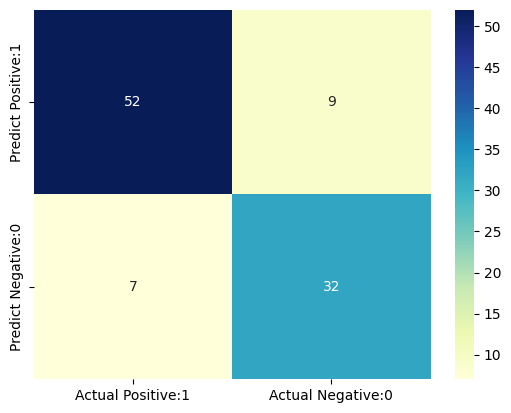

In [30]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        61
           1       0.78      0.82      0.80        39

    accuracy                           0.84       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.84      0.84       100



### 10.Visualising the Traing set result

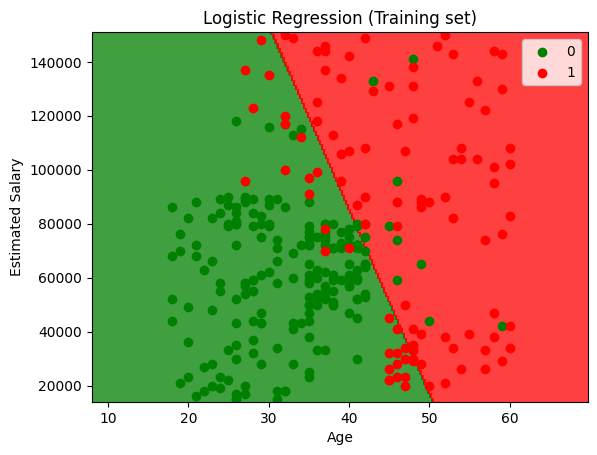

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 11.Visualising the Test set result

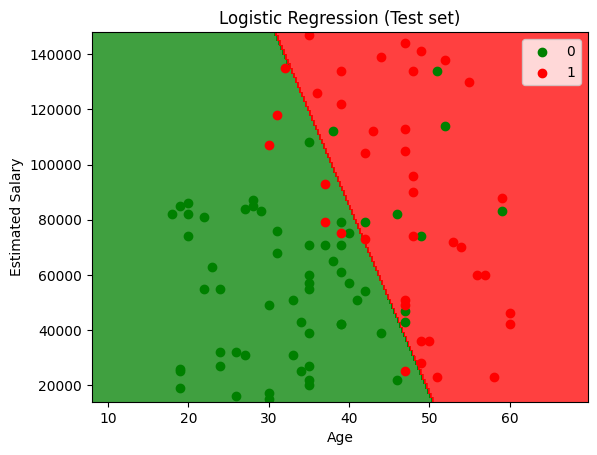

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()